In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('14-income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
#kolon isimlerini düzeltme işlemi boşluklar,- işaretleri ve anlaşılmayan kolonlar var
df.columns=df.columns.str.replace(' ','')

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df.columns=df.columns.str.replace('-','_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
df.rename(columns={'fnlwgt':'finalweight'},inplace=True)

In [11]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [12]:
#kategorik kolonları alalım
cat_cols=[col for col in df.columns if df[col].dtype=='O']

In [13]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [14]:
for i in cat_cols:
    print(df[i].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

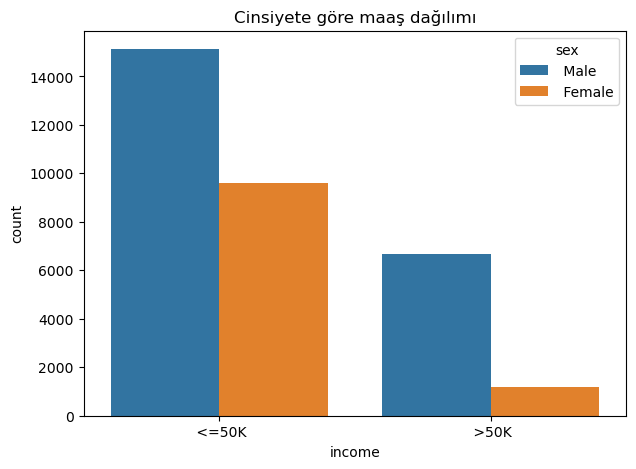

In [15]:
fig,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x='income',data=df,hue='sex')
ax.set_title('Cinsiyete göre maaş dağılımı')
plt.show()

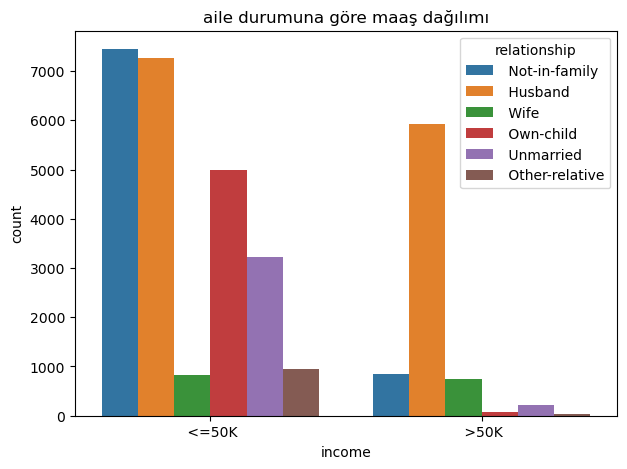

In [16]:
fig,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x='income',data=df,hue='relationship')
ax.set_title('aile durumuna göre maaş dağılımı')
plt.show()

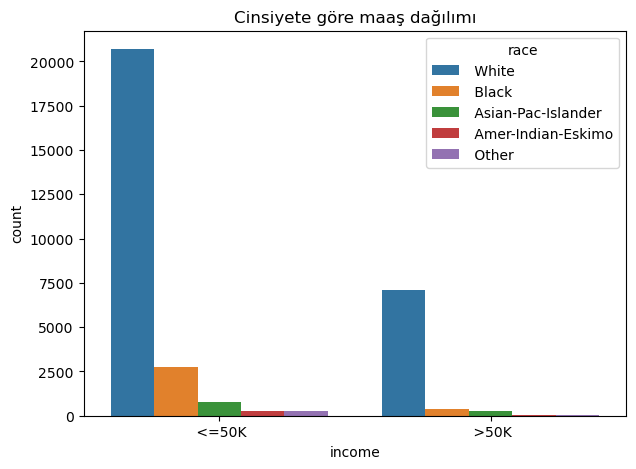

In [17]:
fig,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x='income',data=df,hue='race')
ax.set_title('Cinsiyete göre maaş dağılımı')
plt.show()

In [18]:
df['workclass']=df['workclass'].replace(" ?",np.NaN)

In [19]:
df['occupation']=df['occupation'].replace(" ?",np.NaN)

In [20]:
df['native_country']=df['native_country'].replace(" ?",np.NaN)

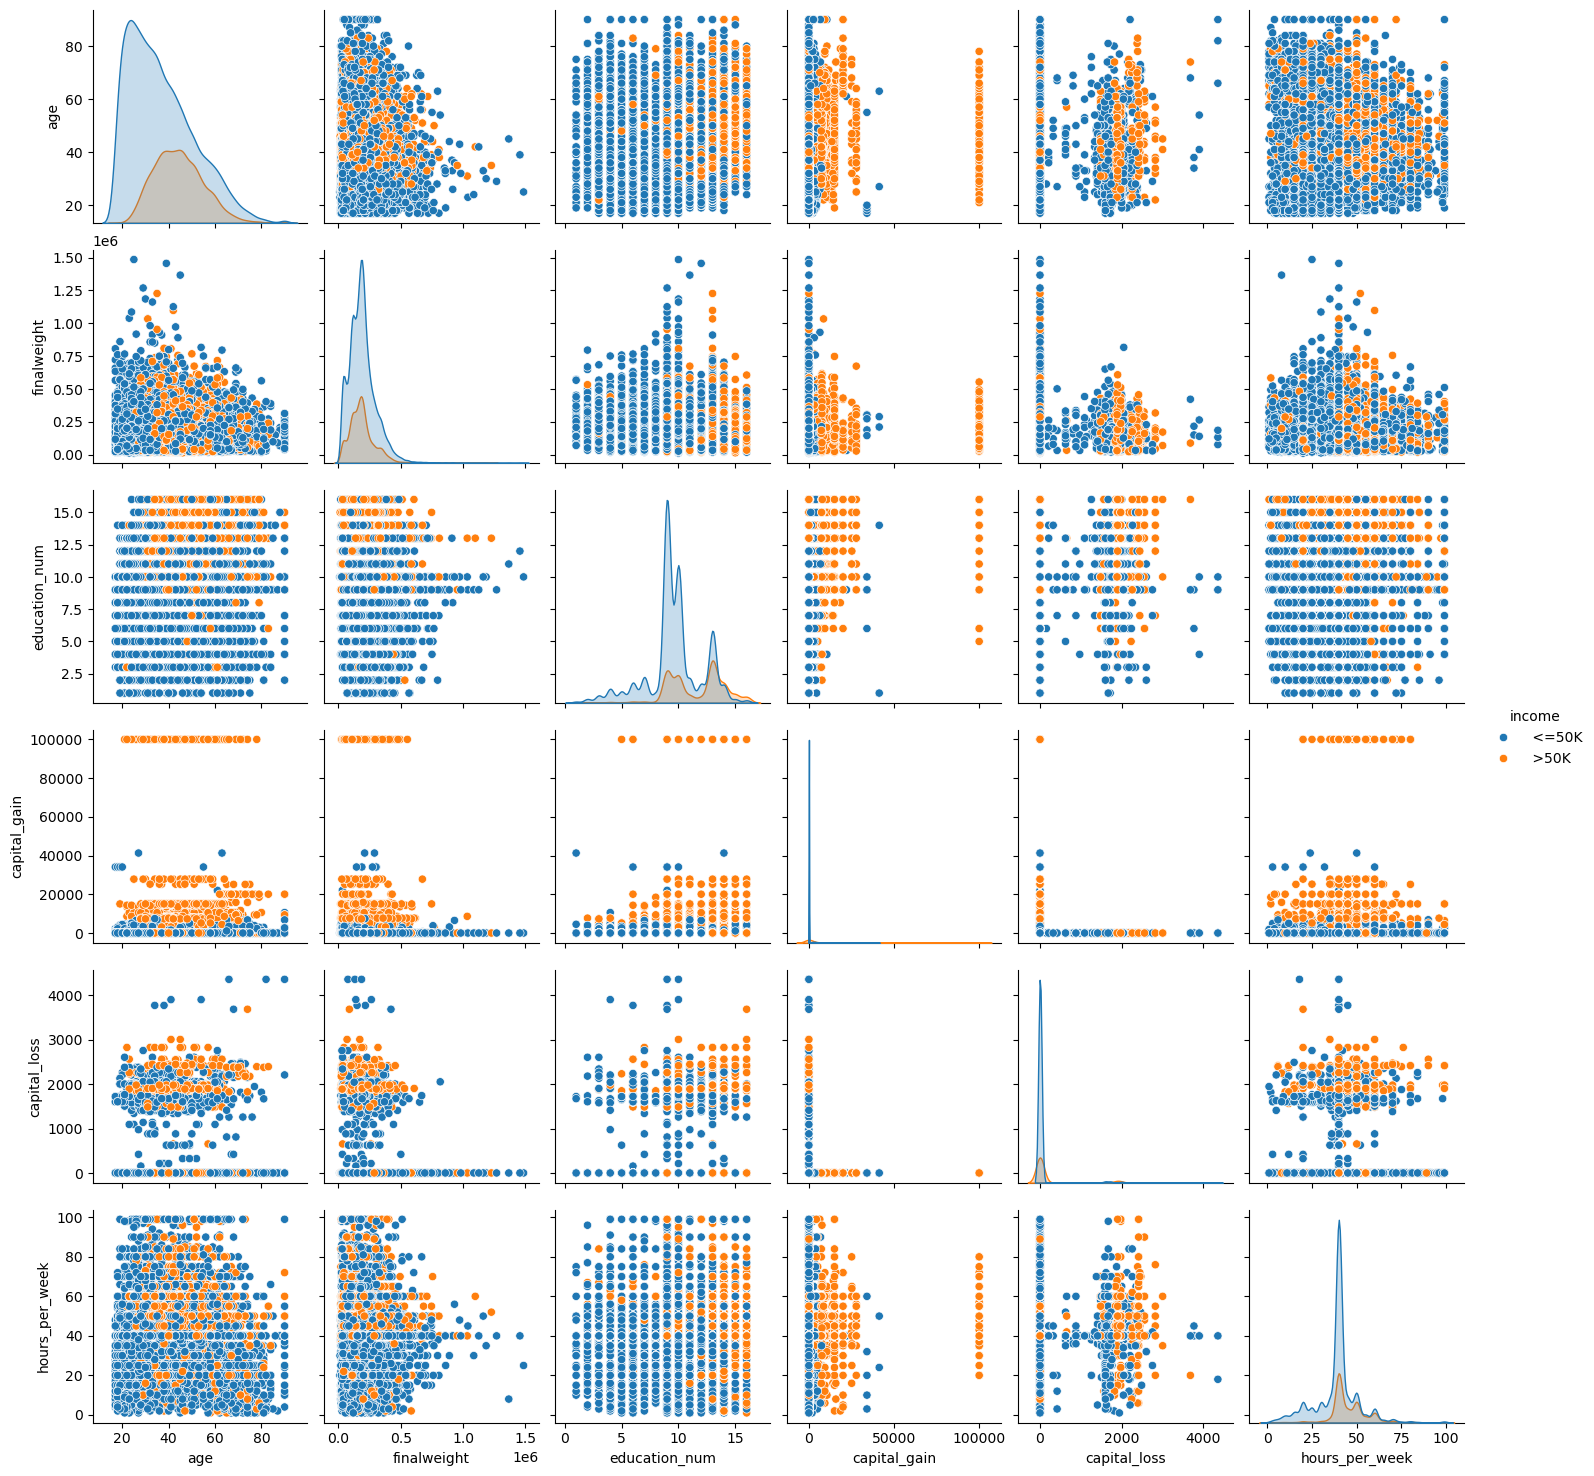

In [21]:
sns.pairplot(df,hue='income')

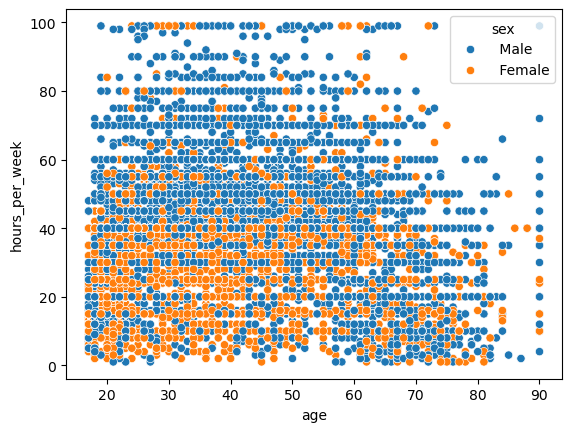

In [22]:
sns.scatterplot(x=df['age'],y=df['hours_per_week'],hue=df['sex'])
plt.show()

In [23]:
over_40_hours=df[df['hours_per_week']>40]
under_40_hours=df[df['hours_per_week']<=40]

In [24]:
over_40_hours['income'].value_counts()

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [25]:
under_40_hours['income'].value_counts()

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [26]:
X=df.drop('income',axis=1)
y=df['income']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [29]:
#kategorik değerler isnull oldugu için modlarını alalım

In [30]:
cat_cols=[col for col in X_train.columns if X_train[col].dtype=='O']

In [31]:
X_train[cat_cols].isnull().sum()

workclass         1364
education            0
marital_status       0
occupation        1368
relationship         0
race                 0
sex                  0
native_country     453
dtype: int64

In [32]:
for i in [X_train,X_test]:
    i['workclass']=i['workclass'].fillna(X_train['workclass'].mode()[0])
    i['occupation']=i['occupation'].fillna(X_train['occupation'].mode()[0])
    i['native_country']=i['native_country'].fillna(X_train['native_country'].mode()[0])

#X_train ile fillna yapmamızın amacı fit-trasnform mantıgı

In [33]:
X_test.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [39]:
#NATİVE COUNTR COK FAZLA OLDUGU İÇİN BUNA ORTLAMA ENCODİNG UYGULAYACAGIZ 
y_train_binary=y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [40]:
target_means=y_train_binary.groupby(X_train['native_country']).mean()

In [43]:
X_train['native_country_encoded']=X_train['native_country'].map(target_means)
X_train['native_country_encoded']=X_train['native_country_encoded'].fillna(y_train_binary.mean())

X_test['native_country_encoded']=X_test['native_country'].map(target_means)
X_test['native_country_encoded']=X_test['native_country_encoded'].fillna(y_train_binary.mean())

In [44]:
X_train.drop('native_country',axis=1,inplace=True)
X_test.drop('native_country',axis=1,inplace=True)

In [60]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [61]:
one_hot_cat=['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [68]:
encoder=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore',sparse_output=False),one_hot_cat)
    ],remainder='passthrough'
    
)

In [69]:
X_train_enc=encoder.fit_transform(X_train)
X_test_enc=encoder.transform(X_test)

In [70]:
columns=encoder.get_feature_names_out()

In [72]:
X_train=pd.DataFrame(data=X_train_enc,columns=columns,index=X_train.index)
X_test=pd.DataFrame(data=X_test_enc,columns=columns,index=X_test.index)

In [74]:
cols=X_train.columns

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc=RandomForestClassifier(n_estimators=8,random_state=42)

In [77]:
rfc.fit(X_train,y_train)

,n_estimators,8
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
y_pred=rfc.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score,classification_report

In [81]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8431396634320109
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      6159
        >50K       0.74      0.56      0.63      1982

    accuracy                           0.84      8141
   macro avg       0.80      0.75      0.77      8141
weighted avg       0.84      0.84      0.84      8141



In [86]:
features_importance=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [89]:
features_importance

remainder__finalweight                     0.159425
remainder__age                             0.140300
cat__marital_status_ Married-civ-spouse    0.095524
remainder__capital_gain                    0.090074
remainder__hours_per_week                  0.078377
                                             ...   
cat__occupation_ Priv-house-serv           0.000093
cat__workclass_ Without-pay                0.000068
cat__education_ Preschool                  0.000031
cat__occupation_ Armed-Forces              0.000019
cat__workclass_ Never-worked               0.000003
Length: 65, dtype: float64

In [90]:
from sklearn.model_selection import RandomizedSearchCV